# Topic Modeling

- LDA: Latent Dirichlet Allocation

In [88]:
from nltk.corpus import reuters, brown
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

In [89]:
brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [177]:
filenames = [brown.fileids(categories=[cat]) for cat in ['romance', 'religion', 'hobbies']]

In [178]:
reutersRaw = [[' '.join(brown.words(fileids=fn)) for fn in fns[:10]] for fns in filenames]

In [179]:
len(reutersRaw[0])

10

In [180]:
len(reutersDocs)

30

In [181]:
reutersDocs = []
for collection in reutersRaw: 
    for doc in collection:
        reutersDocs.append(doc)

In [182]:
len(reutersDocs)

30

In [183]:
countVectorizer = CountVectorizer(stop_words='english', max_features=1000)

In [184]:
reutersCounts = countVectorizer.fit_transform(reutersDocs)

In [185]:
wordLabels = countVectorizer.get_feature_names()

In [191]:
reutersCounts

<30x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 6268 stored elements in Compressed Sparse Row format>

In [192]:
reutersLabels = [doc[:50] for doc in reutersDocs]

In [193]:
wordLabelsNoNums = [wordLabel for wordLabel in wordLabels if wordLabel.isalpha()]

In [194]:
pd.DataFrame(reutersCounts.todense(), index=reutersLabels, columns=wordLabels).head()

,000,10,100,12,15,16,1961,20,30,32,...,worry,wouldn,yang,year,years,yellow,yes,yin,york,young
They neither liked nor disliked the Old Man . To t,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,4,0,0,0,0
People came in and out all evening to see the baby,0,0,0,0,0,0,0,0,0,0,...,2,4,0,0,0,0,0,0,1,1
`` Thrifty of her to use it up . Unusual in a case,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,0,5,0,0,2
"`` He must have forgiven me '' , Henrietta murmure",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,3,0,0,0,0,3
The Momoyama family had come from Miyagi Prefectur,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,0,10


In [224]:
countVectorizer = CountVectorizer(stop_words='english', min_df=3, max_df=0.6, vocabulary=wordLabelsNoNums, max_features=700)

In [225]:
reutersCounts = countVectorizer.fit_transform(reutersDocs)

In [226]:
reutersDf = pd.DataFrame(reutersCounts.todense(), index=reutersLabels, columns=wordLabelsNoNums)

In [227]:
reutersDf

,able,accept,accepted,according,action,actions,active,actually,adam,added,...,worry,wouldn,yang,year,years,yellow,yes,yin,york,young
They neither liked nor disliked the Old Man . To t,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,4,0,0,0,0
People came in and out all evening to see the baby,0,0,0,0,0,0,0,0,0,0,...,2,4,0,0,0,0,0,0,1,1
`` Thrifty of her to use it up . Unusual in a case,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,0,5,0,0,2
"`` He must have forgiven me '' , Henrietta murmure",1,0,0,0,0,2,0,0,0,0,...,0,0,0,0,3,0,0,0,0,3
The Momoyama family had come from Miyagi Prefectur,0,0,1,0,0,0,0,2,0,0,...,0,1,0,0,1,0,1,0,0,10
"How , he wondered , does one enjoy one's spare tim",0,0,0,0,0,0,1,0,0,1,...,0,0,0,1,1,1,2,0,0,0
Spencer said nothing . `` Is there any word you wo,0,1,0,0,1,1,0,0,0,1,...,0,0,0,1,0,0,3,0,2,0
Rachel steered me along toward a school for young,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,5
`` And I'll take you with me '' . The two of them,1,0,0,0,0,0,0,0,0,0,...,0,2,0,1,1,0,1,0,1,1
"Among us , we three handled quite a few small comm",1,0,0,0,0,0,0,2,0,0,...,0,2,0,4,3,1,1,0,0,0


In [241]:
lda = LatentDirichletAllocation(n_components=5)

In [242]:
ldaOut = lda.fit_transform(reutersCounts)

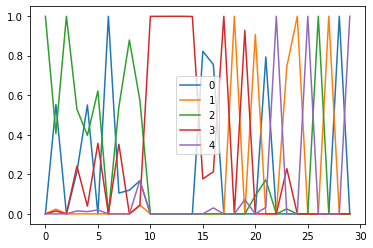

In [243]:
pd.DataFrame(ldaOut).plot()

In [244]:
lda.components_.shape

(5, 981)

In [246]:
topicWordMatrix = pd.DataFrame(lda.components_, index=['Topic ' + str(x) for x in range(5)], columns=wordLabelsNoNums)

In [247]:
topicWordMatrix.loc['Topic 0'].sort_values(ascending=False).head(15)

hanover      63.200000
like         41.303285
god          39.971587
said         39.944493
time         39.682875
good         35.560816
spencer      28.200000
world        27.895497
man          24.064579
light        23.163751
best         22.839753
lord         21.406849
alexander    20.200000
fear         19.406621
maggie       19.178779
Name: Topic 0, dtype: float64

In [248]:
topicWordMatrix.loc['Topic 1'].sort_values(ascending=False).head(15)

class          43.750985
church         43.201539
junior         35.199989
new            34.363310
members        31.201129
membership     31.200679
juniors        30.200000
formula        22.200000
volume         22.200000
year           19.360624
af             19.200281
dog            18.200403
exercise       18.200257
westminster    18.199943
time           17.734109
Name: Topic 1, dtype: float64

In [249]:
topicWordMatrix.loc['Topic 2'].sort_values(ascending=False).head(15)

said      73.435097
like      57.838065
man       49.867691
old       46.295657
did       44.985606
ll        32.833921
way       32.423078
long      31.308386
just      30.850930
bar       30.535088
don       27.958845
frame     26.193815
know      25.585134
little    24.185791
didn      23.607677
Name: Topic 2, dtype: float64

In [250]:
def getWords(topicName): 
    return ' '.join(list(topicWordMatrix.loc[topicName].sort_values(ascending=False).head(5).index))

In [251]:
topicLabelsWords = [getWords(topic) for topic in ['Topic ' + str(x) for x in range(5)]]

In [252]:
topicLabelsWords

['hanover like god said time',
 'class church junior new members',
 'said like man old did',
 'god man world spirit church',
 'aircraft boat new nuclear missile']

In [253]:
ldaOut.shape

(30, 5)

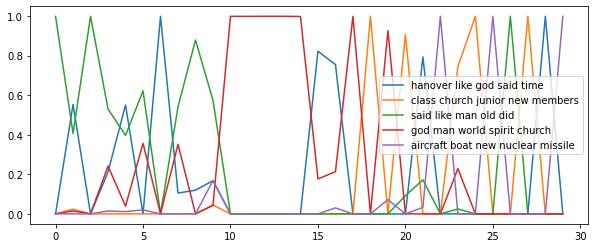

In [254]:
pd.DataFrame(ldaOut, columns=topicLabelsWords).plot(figsize=(10,4))